# Статистика, DS-поток
## Задание S.12

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.



**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание.**

Практика:
* Задача P1 &mdash; 80 баллов;
* Задача P2 &mdash; 100 баллов.
* Задача P3 &mdash; 10 баллов;
* Задача P4 &mdash; 80 баллов.

Задачи разных типов учитываются в разных рейтингах.

**Важность задач:**

* *высокая:* задачи P2, P3;
* *обычная:* задача P1, P4.

In [543]:
# Bot check

# HW_ID: ds_sp12
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [544]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import warnings

warnings.filterwarnings("ignore")

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

---
### Задача P1.

Галапагосские острова &mdash; группа островов вулканического происхождения на востоке экваториальной части Тихого океана, в 972 км к западу от Эквадора, состоящая из 13 основных вулканических островов, 6 небольших островов и 107 скал и намывных территорий.

Острова известны прежде всего большим количеством местных видов фауны и проведённым здесь исследованием Чарлза Дарвина, которое послужило для него первым толчком к созданию эволюционной теории происхождения видов.


Загрузите датасет `galapagos.csv`, в котором содержатся данные об островах на Галапагосском архипелаге:
* `island` &mdash; наименование острова;
* `species` &mdash; количество наблюдаемых видов растений на острове;
* `endemics` &mdash; количество уникальных видов [*в задаче не рассматриваем*];
* `area` &mdash; площадь (км^2);
* `elevation` &mdash; высота (м);
* `nearest` &mdash; расстояние до ближайшего острова (км);
* `scruz` &mdash; расстояние до самого крупного острова архипелага Санта-Крус (км);
* `adjacent` &mdash; площадь соседнего острова (км^2).

In [545]:
galapagos_df = pd.read_csv("galapagos.csv", sep=";")

galapagos_df.head(10)

,island,species,endemics,area,elevation,nearest,scruz,adjacent
0,Baltra,58,23,25.09,332,0.600000,0.600000,1.840000
1,Bartolome,31,21,1.24,109,0.600000,26.299999,572.330017
2,Caldwell,3,3,0.21,114,2.800000,58.700001,0.780000
3,Champion,25,9,0.10,46,1.900000,47.400002,0.180000
4,Coamano,2,1,1.05,130,1.900000,1.900000,903.820007
5,Daphne Major,18,11,0.34,119,8.000000,8.000000,1.840000
6,Daphne Minor,24,12,0.08,93,6.000000,12.000000,0.340000
7,Darwin,10,7,2.33,168,34.099998,290.200012,2.850000
8,Eden,8,4,0.03,46,0.400000,0.400000,17.950001
9,Enderby,2,2,0.18,112,2.600000,50.200001,0.100000


Рассмотрим пуассоновскую регрессию. Какая ожидается зависимость `species` от остальных признаков?

`area` --   Чем больше площадь, тем вероятнее большее разнообразие

`elevation` -- Если высота не экстремально, то это также положительно сказывается на разнообразии растений.

`nearest` -- Чем ближе острова, тем выше шанс обмена эндемиками, а значит и большее разнообразие.

`scruz` -- Чем ближе остров к большой части суши с высоким разнообразием природы, тем выше вероятность, что и на острове природа будет разнообразной

`adjacent` -- аналогично предыдущему пункту.

Постройте графики зависимости `species` от всех признаков. При необходимости выполните нелинейные преобразования некоторых их них.

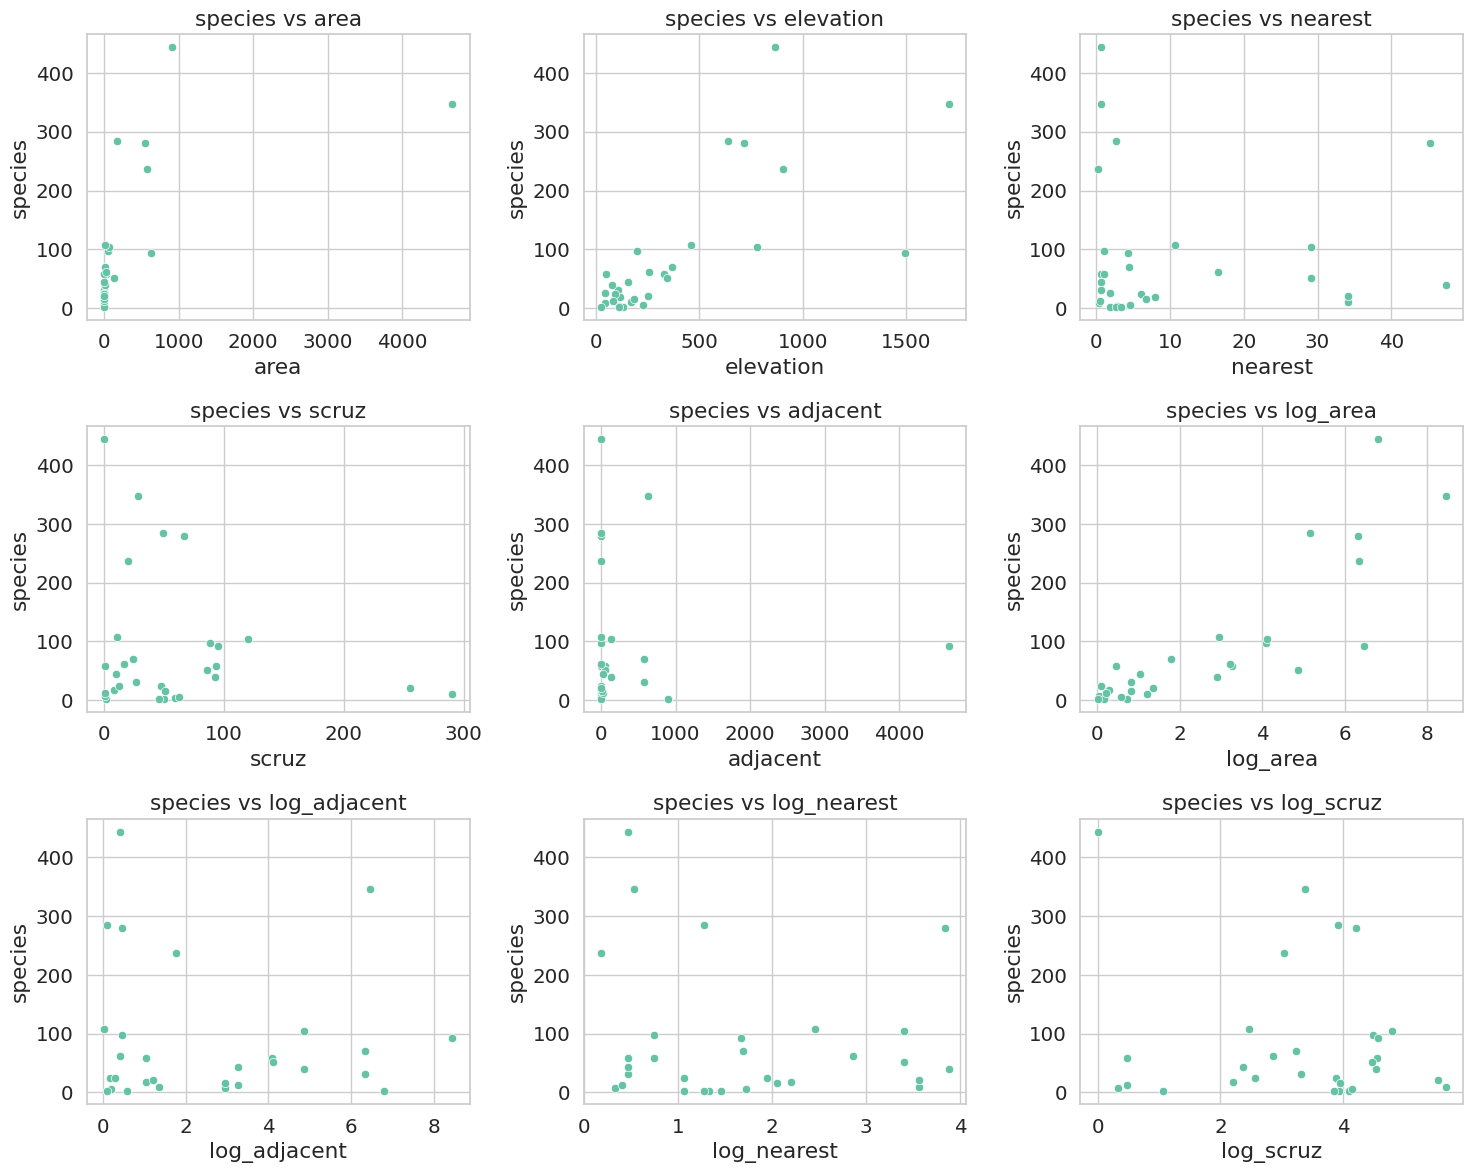

In [546]:
galapagos_df["log_area"] = np.log(galapagos_df["area"] + 1)
galapagos_df["log_adjacent"] = np.log(galapagos_df["adjacent"] + 1)
galapagos_df["log_nearest"] = np.log(galapagos_df["nearest"] + 1)
galapagos_df["log_scruz"] = np.log(galapagos_df["scruz"] + 1)

features = [
    "area",
    "elevation",
    "nearest",
    "scruz",
    "adjacent",
    "log_area",
    "log_adjacent",
    "log_nearest",
    "log_scruz",
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(ax=axes[i], x=galapagos_df[feature], y=galapagos_df["species"])
    axes[i].set_title(f"species vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("species")

plt.tight_layout()
plt.show()

Обучите пуассоновскую регрессию по всем признакам. Регрессию можно сделать функцией `glm`, указав конкретный тип семейства как `family = sm.families.Poisson()`. Напечатайте `summary` модели.

In [547]:
X = galapagos_df[
    [
        "area",
        "elevation",
        "nearest",
        "scruz",
        "adjacent",
        "log_area",
        "log_adjacent",
        "log_nearest",
        "log_scruz",
    ]
]
y = galapagos_df["species"]
X = sm.add_constant(X)

model_galapogos = sm.GLM(y, X, family=sm.families.Poisson())
results_galapogos = model_galapogos.fit()

print(results_galapogos.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                species   No. Observations:                   30
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -267.89
Date:                Tue, 03 Dec 2024   Deviance:                       374.94
Time:                        00:40:01   Pearson chi2:                     393.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.7336      0.104     26.207   

Оставьте только значимые признаки, обучите модель еще раз и проинтерпретируйте полученные результаты. Какой смысл имеют коэффициенты модели?

Как видим, pvalue < 0.05 почти у всех коэффициентов, кроме  log_scruz. Коэффициенты модели -- коэффициенты построенной гауссовской линейной регрессии.

In [548]:
X_ver2 = galapagos_df[
    [
        "area",
        "elevation",
        "nearest",
        "scruz",
        "adjacent",
        "log_area",
        "log_adjacent",
        "log_nearest",
    ]
]

X_ver2 = sm.add_constant(X_ver2)

model_galapogos_ver2 = sm.GLM(y, X_ver2, family=sm.families.Poisson())
results_galapogos_ver2 = model_galapogos_ver2.fit()

print(results_galapogos_ver2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                species   No. Observations:                   30
Model:                            GLM   Df Residuals:                       21
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -267.89
Date:                Tue, 03 Dec 2024   Deviance:                       374.94
Time:                        00:40:01   Pearson chi2:                     393.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.7348      0.102     26.879   

При использовании статистических свойств необходимо выполнить проверку предположений модели. Аналогом гомоскедастичности для гауссовской линейной модели в случае пуассоновской регрессии является равенство математического ожидания и дисперсии (это свойство пуассоновского распределения).

Аналогично гауссовской линейной модели можно определить устойчивые оценки дисперсии. Посчитайте и напечатайте ковариационную матрицу оценок коэффициентов модели с помощью функции `cov_params`, рассмотрев тип оценки `HC3`.

In [549]:
X = galapagos_df[
    [
        "area",
        "elevation",
        "nearest",
        "scruz",
        "adjacent",
    ]
]
y = galapagos_df["species"]

model_galapogos_v3 = sm.GLM(y, X, family=sm.families.Poisson())
results_galapogos_v3 = model_galapogos_v3.fit(cov_type="HC3")
results_galapogos_v3.cov_params()

,area,elevation,nearest,scruz,adjacent
area,4.641929e-08,-1.466453e-07,9.276559e-07,5.174840e-07,2.937884e-08
elevation,-1.466453e-07,4.769866e-07,-1.811243e-06,-2.427424e-06,-8.292156e-08
nearest,9.276559e-07,-1.811243e-06,3.475127e-04,-1.176280e-04,2.610111e-06
scruz,5.174840e-07,-2.427424e-06,-1.176280e-04,7.918683e-05,-7.864760e-07
adjacent,2.937884e-08,-8.292156e-08,2.610111e-06,-7.864760e-07,3.679692e-08


Напечатайте таблицу статистических свойств оценок коэффициентов и доверительные интервалы.

In [550]:
print(results_galapogos.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                species   No. Observations:                   30
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -267.89
Date:                Tue, 03 Dec 2024   Deviance:                       374.94
Time:                        00:40:01   Pearson chi2:                     393.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.7336      0.104     26.207   

Придумайте на Галапагосском архипелаге еще один остров, задайте ему некоторые характеристики и назовите своим именем. Оцените, в каком интервале лежит ожидаемое количество видов растений на этом острове.

*Указание.* Воспользуйтесь функцией <a href="https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLMResults.get_prediction.html">get_prediction</a> от `GLMResults`. Данная функция возвращает объект <a href="https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.PredictionResults.html">`PredictionResults`</a>, у которого можно вызвать метод `conf_int`.

In [551]:
alexander_island = pd.DataFrame(columns=galapagos_df.columns, data = galapagos_df.iloc[[0]])
alexander_island["const"] = 1
alexander_island["island"] = "alexander_island"

for column in features:
    alexander_island[column] *= np.random.uniform(0.7, 1.5)
    pass


alexander_island["log_area"] = np.log(alexander_island["area"] + 1)
alexander_island["log_adjacent"] = np.log(alexander_island["adjacent"] + 1)
alexander_island["log_nearest"] = np.log(alexander_island["nearest"] + 1)
alexander_island["log_scruz"] = np.log(alexander_island["scruz"] + 1)


X_alexander = alexander_island[
    [
        "const", 
        "area",
        "elevation",
        "nearest",
        "scruz",
        "adjacent",
        "log_area",
        "log_adjacent",
        "log_nearest",
        "log_scruz",
    ]
]



prediction = results_galapogos.get_prediction(X_alexander.iloc[0])
predicted_value = prediction.conf_int()


print(f"На нашем острове ожидается [{int(predicted_value[0][0])}, {int(predicted_value[0][1])}] видов растений")

print("Характеристики нашего острова")

alexander_island = alexander_island.drop(columns=["const"])
alexander_island

На нашем острове ожидается [85, 102] видов растений
Характеристики нашего острова


,island,species,endemics,area,elevation,nearest,scruz,adjacent,log_area,log_adjacent,log_nearest,log_scruz
0,alexander_island,58,23,31.845906,463.837087,0.790503,0.78573,2.730865,3.491827,1.31664,0.582497,0.579827


Наконец, предложите способ получения предсказательного интервала для количества растений на вашем острове. Постройте его

In [ ]:
mean = prediction.predicted_mean[0]
alpha = 0.05
z = sps.norm.ppf(1 - alpha / 2)

lower_bound = mean - z * prediction.se_mean[0]
upper_bound = mean + z * prediction.se_mean[0]


print(f"Предсказательный интервал [{lower_bound:.1f}, {upper_bound:.1f}]")

Предсказательный интервал [85.5, 102.0]


**Вывод:**

В работе были исследована работа пуассоновской регресии. На примере датасета Галапагоских островов мы исследовали значимость признаков, была построена ГЛМ, выведены ее свойства. После модель была протестирована на выдуманном острове, для которого была получены основные статистические характеристики.

Путем анализа модели, был показан принцип по которому определяется значимость признаков.

---
### Задача P2.

Кардиотокография (КТГ) — непрерывная одновременная регистрация частоты сердечных сокращений плода и
тонуса матки с графическим изображением физиологических сигналов на калибровочной ленте. В настоящее
время КТГ является ведущим методом наблюдения за характером сердечной деятельности, который из-за
своей простоты в проведении, информативности и стабильности получаемой информации практически
полностью вытеснил из клинической практики фоно- и электрокардиографию плода.

Для облегчения задачи диагностики, результаты кардиотокографии некоторых эмбрионов были
классифицированы специалистами на нормальные и патологические. По показаниям приборов было
сгенерировано некоторое количество признаков.

**1.** Скачайте данные по ссылке: https://archive.ics.uci.edu/ml/datasets/cardiotocography.
Данные расположены в листе `Data`. Рассматриваемые нами признаки указаны в листе Description в колонке Features. Целевой меткой является столбец `NSP`. Для анализа мы не будем рассматривать данные, целевой меткой которой является `Suspect`.

In [553]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cardiotocography = fetch_ucirepo(id=193) 
  
# data (as pandas dataframes) 
X = cardiotocography.data.features 
y = cardiotocography.data.targets.drop(columns=["CLASS"])
X = X[y["NSP"] != 2]
y = y[y["NSP"] != 2]

y[y["NSP"] == 1] = 1
y[y["NSP"] == 3] = 0

In [554]:
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
1,132,0.006,0.0,0.006,0.003,0.0,0.000,17,2.1,0,...,130,68,198,6,1,141,136,140,12,0
2,133,0.003,0.0,0.008,0.003,0.0,0.000,16,2.1,0,...,130,68,198,5,1,141,135,138,13,0
3,134,0.003,0.0,0.008,0.003,0.0,0.000,16,2.4,0,...,117,53,170,11,0,137,134,137,13,1
4,132,0.007,0.0,0.008,0.000,0.0,0.000,16,2.4,0,...,117,53,170,9,0,137,136,138,11,1
5,134,0.001,0.0,0.010,0.009,0.0,0.002,26,5.9,0,...,150,50,200,5,3,76,107,107,170,0


**2.** Проведите визуальный анализ данных. Какие признаки лучше всего разделяют классы?

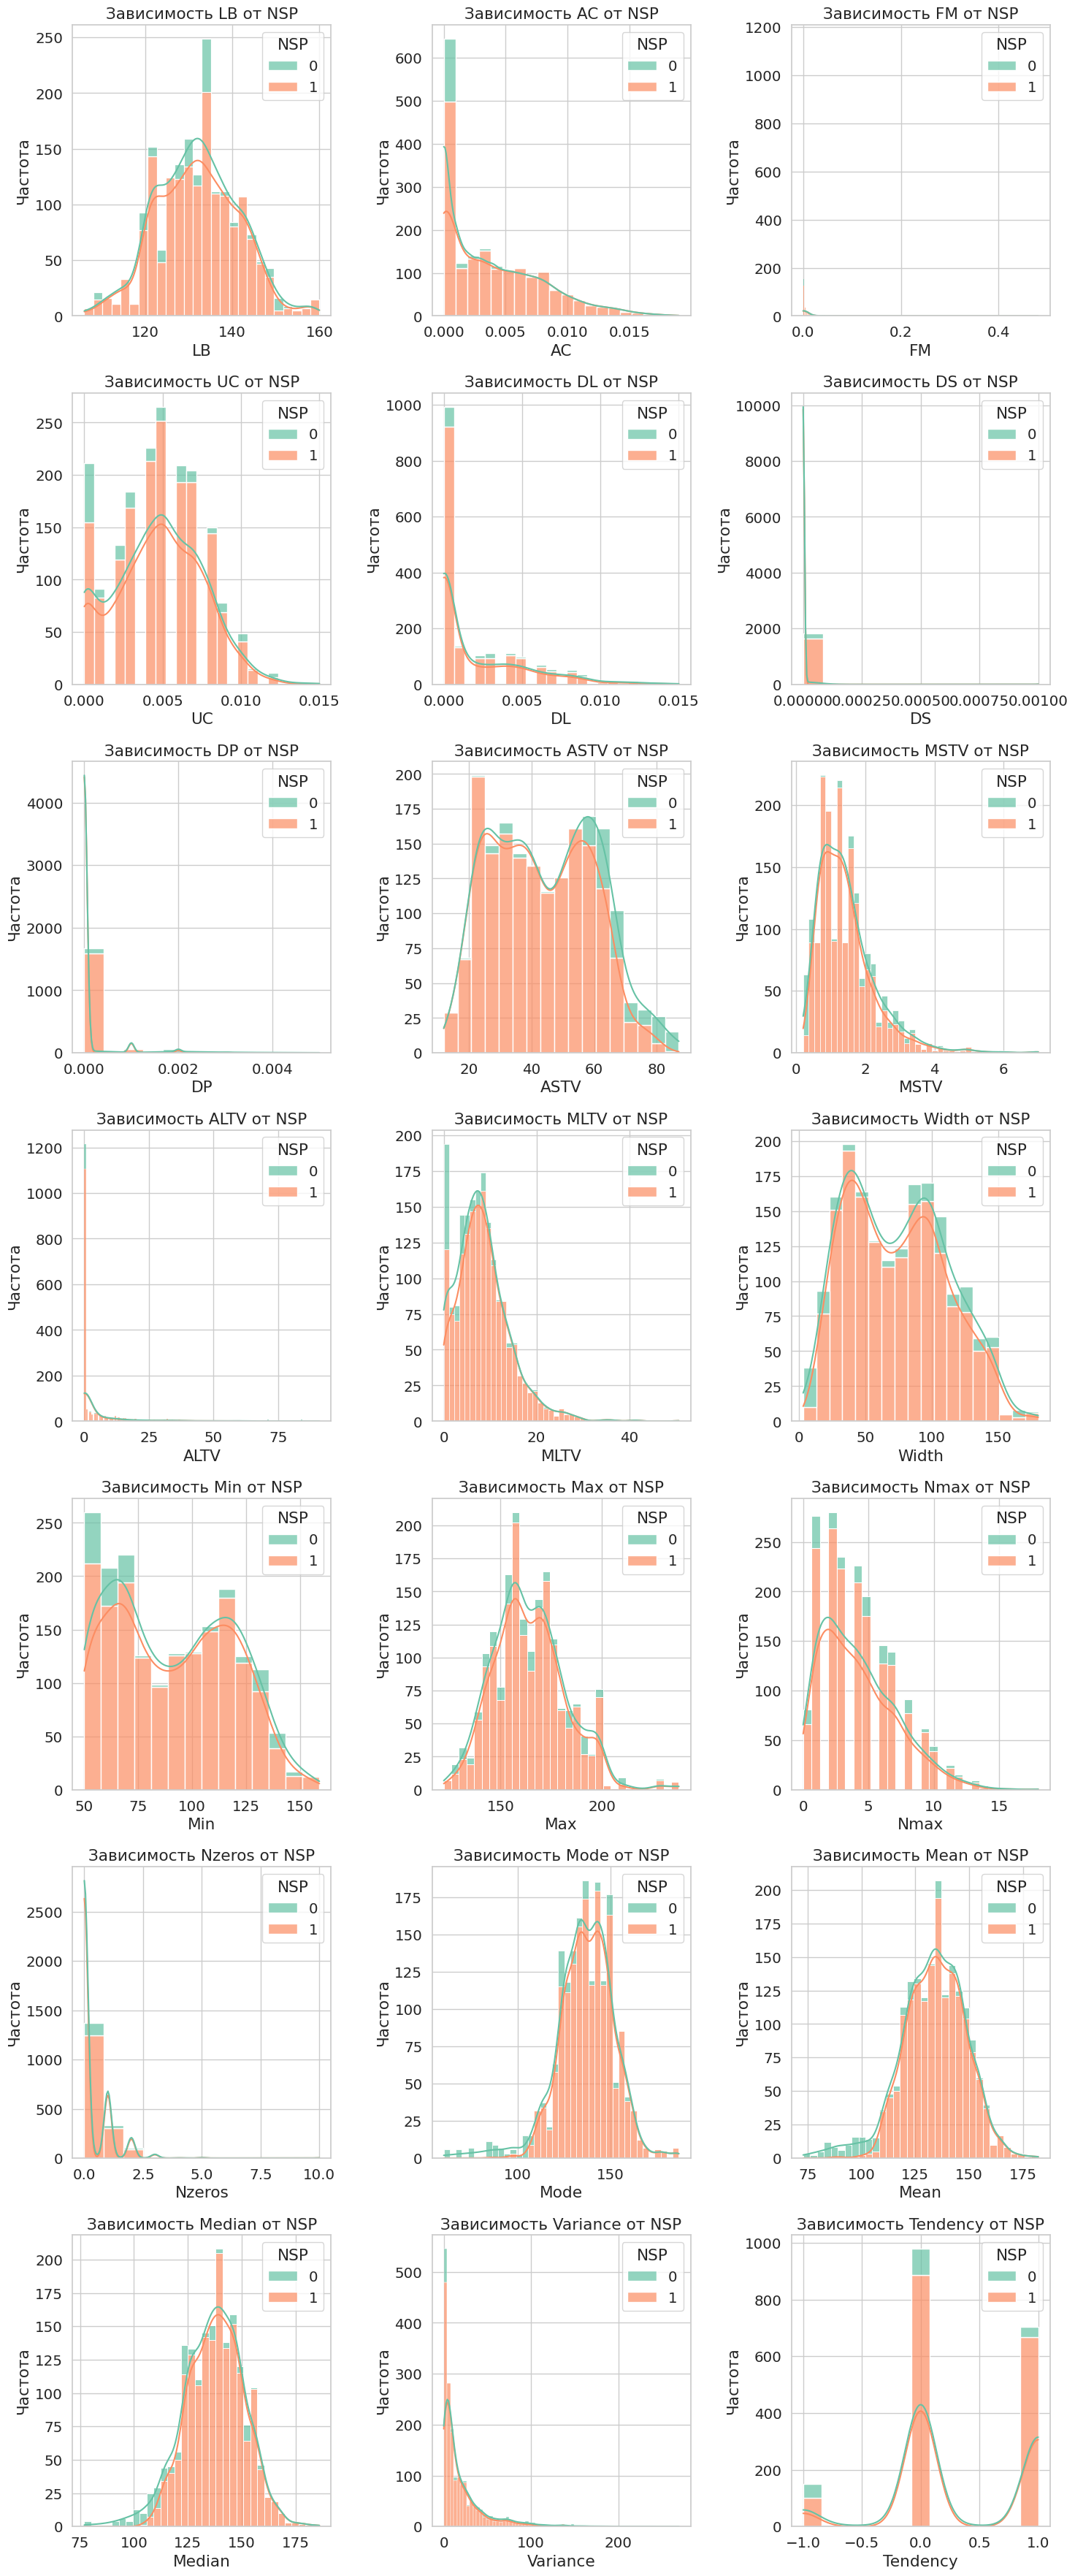

In [555]:
data = X.copy()
data["NSP"] = y["NSP"]

n_cols = 3
n_rows = (len(X.columns) // n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(X.columns):
    sns.histplot(data=data, x=column, hue="NSP", kde=True, ax=axes[i], multiple="stack", alpha=0.7)
    axes[i].set_title(f"Зависимость {column} от NSP")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Частота')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Хорошо раздяляющими признаками можно назвать: AC, DL, ASTV

Впрочем, так как данные смешаны, то ни один из них по отдельности не разделяет данные.

In [556]:
def calculate_f1_score(X, y, X_test, y_test, add_const=False):
    log_reg = sm.GLM(y, X, family=sm.families.Binomial())
    results_log_reg = log_reg.fit()

    if add_const:
        X_test = sm.add_constant(X_test)
    y_pred_prob = results_log_reg.predict(X_test)
    y_pred = np.round(y_pred_prob)  


    f1 = f1_score(y_test, y_pred)
    print(f"F1-score={f1:.2f}")
    return f1


**3.** Разделите выборку на обучающую и тестовую часть случайным образом в соотношении 4:1.

In [557]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

**4.** Обучите логистическую регрессию по всем признакам. Напечатайте `summary` модели.
В чем причины такого поведения модели? Какие выводы можно сделать? Что нужно сделать, чтобы это исправить?

In [558]:
X = train.drop(columns=["NSP"])
X = sm.add_constant(X)
y = train["NSP"]

log_reg = sm.GLM(y, X, family=sm.families.Binomial())
results_log_reg = log_reg.fit()

print(results_log_reg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    NSP   No. Observations:                 1373
Model:                            GLM   Df Residuals:                     1352
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.830
Date:                Tue, 03 Dec 2024   Deviance:                       79.661
Time:                        00:40:25   Pearson chi2:                     172.
No. Iterations:                    17   Pseudo R-squ. (CS):             0.4463
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.4924      8.738      3.261      0.0

In [559]:
calculate_f1_score(X, y, test.drop(columns=["NSP"]), test["NSP"], add_const=True);

F1-score=0.99


Видим, что некоторые параметры имеют отклонение больше, чем собственное значение, значит вероятны нелиненый признаки. Чтобы их исправить необходимо их преобразовать к линейным.

Как видим, У нас достаточно много незначимых признаков, избавимся от них. 

In [560]:
summary_df = results_log_reg.summary2().tables[1]
significant_features = summary_df[summary_df["P>|z|"] < 0.05].index

# Вывод значимых столбцов
significant_columns = list(significant_features)
print("Столбцы с p-value < 0.05:", significant_columns)

Столбцы с p-value < 0.05: ['const', 'LB', 'UC', 'DP', 'ASTV', 'ALTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Median', 'Variance']


Попробуем обучиться только по значимым признакам

In [561]:
X_significant = X[significant_columns]
y = train["NSP"]

tmp_test = test.copy()
tmp_test["const"] = 1
X_test = tmp_test[significant_columns]

log_reg_significant = sm.GLM(y, X_significant, family=sm.families.Binomial())
results_log_reg_significant = log_reg_significant.fit()

print(results_log_reg_significant.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    NSP   No. Observations:                 1373
Model:                            GLM   Df Residuals:                     1361
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.338
Date:                Tue, 03 Dec 2024   Deviance:                       114.68
Time:                        00:40:25   Pearson chi2:                 1.25e+03
No. Iterations:                    33   Pseudo R-squ. (CS):             0.4320
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7725      5.200      4.187      0.0

In [562]:
calculate_f1_score(X_significant, y, X_test, test["NSP"], add_const=False);

F1-score=0.99


Также избавимся от слишком скоррелированных признаков

In [563]:
correlation_matrix = X_significant.corr().round(2).abs()

# Маска, чтобы выбрать только значения корреляции > 0.5 (исключая диагональ)
mask = correlation_matrix > 0.75
mask.values[[i for i in range(mask.shape[0])], [i for i in range(mask.shape[1])]] = False

pairs = set(
    tuple(sorted((correlation_matrix.columns[i], correlation_matrix.columns[j]))) 
    for i in range(mask.shape[0]) 
    for j in range(mask.shape[1]) 
    if mask.iloc[i, j]
)

pairs = list(pairs)  # Лист со скорелированными столбцами
pairs

[('LB', 'Median'), ('Min', 'Width')]

Уберем скоррелированные столбцы

In [564]:
corr_columns = [pair[1] for pair in pairs]
X_not_corr = X_significant.copy().drop(columns = corr_columns)

Снова обучим модель

In [565]:
X_not_corr = sm.add_constant(X_not_corr)
y = train["NSP"]

X_test = tmp_test[X_not_corr.columns]

log_reg_not_corr = sm.GLM(y, X_not_corr, family=sm.families.Binomial())
results_log_reg_not_corr = log_reg_not_corr.fit()

print(results_log_reg_not_corr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    NSP   No. Observations:                 1373
Model:                            GLM   Df Residuals:                     1362
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -98.644
Date:                Tue, 03 Dec 2024   Deviance:                       197.29
Time:                        00:40:26   Pearson chi2:                 1.14e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3968
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4058      3.338      2.518      0.0

In [566]:
calculate_f1_score(X_not_corr, y, X_test, test["NSP"], add_const=False);


F1-score=0.99


Как видим, мы уменьшили количество признаков, не сильно потеряв в функции правдоподобия и f1-score

**5.** Проверьте модель на линейность по значимым признакам, используя сглаженные диаграммы рассеивания. Для избежания влияния выбросов стройте диаграммы в интервале от 0.05-квантили до 0.95-квантили по значениям каждого признака. В качестве ширины ядра берите треть этого диапазона. Какие выводы можно сделать?

Index(['const', 'LB', 'UC', 'DP', 'ASTV', 'ALTV', 'Min', 'Max', 'Nmax',
       'Nzeros', 'Variance'],
      dtype='object')


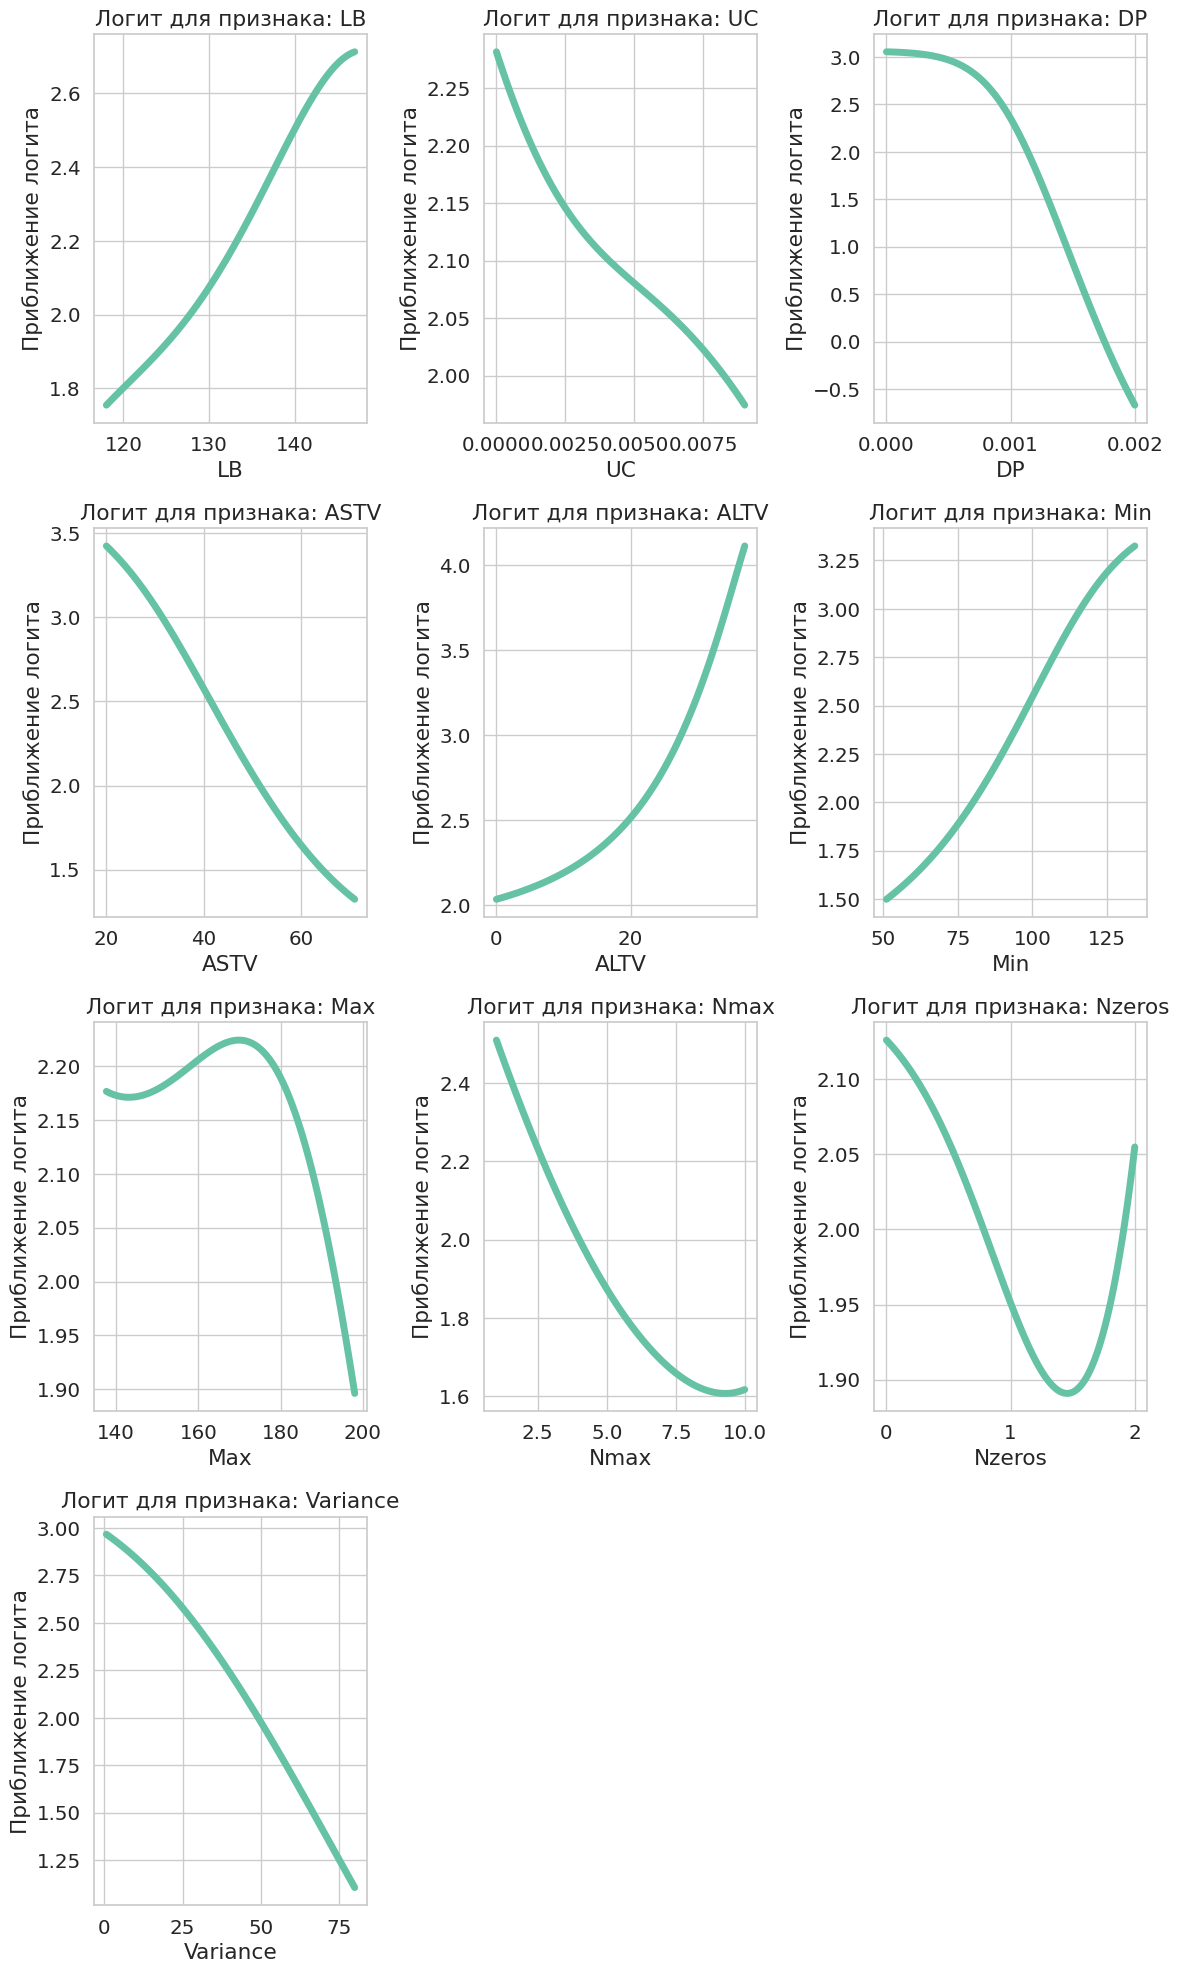

In [567]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

def plot_logit_approximation(results_log_reg, X, y, size=100):
    """
    Построение приближений логита с использованием ядерной регрессии для признаков.
    
    Параметры:
    - results_log_reg: объект модели GLM, уже обученной (fit)
    - X: DataFrame с признаками
    - y: Series с целевой переменной
    - size: размер сетки для ядерной регрессии (по умолчанию 100)
    """
    feature_names = results_log_reg.params.index[1:]
    num_features = len(feature_names)
    
    n_rows = int(np.ceil(num_features / 3))  
    n_cols = 3

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
    axes = axes.flatten()  

    for i, feature in enumerate(feature_names):
        x_grid = np.linspace(
            np.percentile(X[feature], 5), 
            np.percentile(X[feature], 95),
            size
        )
        
        h = (np.percentile(X[feature], 95) - np.percentile(X[feature], 5)) / 3

        kernel = sps.norm(scale=h)
        
        kernel_values = kernel.pdf(X[feature].values[:size, np.newaxis] - x_grid[np.newaxis, :])
        
        kernel_sum = kernel_values.sum(axis=0)
        y_est = (y.values[:size, np.newaxis] * kernel_values).sum(axis=0) / kernel_sum

        y_est = np.clip(y_est, 1e-6, 1 - 1e-6)
        l_sm = np.log(y_est / (1 - y_est))
        
        # Отрисовка графиков
        axes[i].plot(x_grid, l_sm, lw=5)
        axes[i].set_xlabel(f'{feature}')
        axes[i].set_ylabel('Приближение логита')
        axes[i].set_title(f'Логит для признака: {feature}')
    
    for ax in axes[num_features:]:
        ax.remove()

    plt.tight_layout()
    plt.show()

print(X_not_corr.columns)
plot_logit_approximation(results_log_reg_not_corr, X_not_corr, y)


Линейными можно назвать ASTV, Min, Variance

Почти линейными: LB

**6.** Можно ли для каких-то из признаков, по которым не подтвердилась линейность модели, добиться линейности с помощью преобразований? В качестве преобразований можно использовать логарифмирование, возведение в квадрат, взятие модуля, сдвиг, введение нескольких признаков и т.д..

Можно попробовать как-то модернизировать  UC,  ALTV, Nmax, Nzeros. Например возведением в квадрат

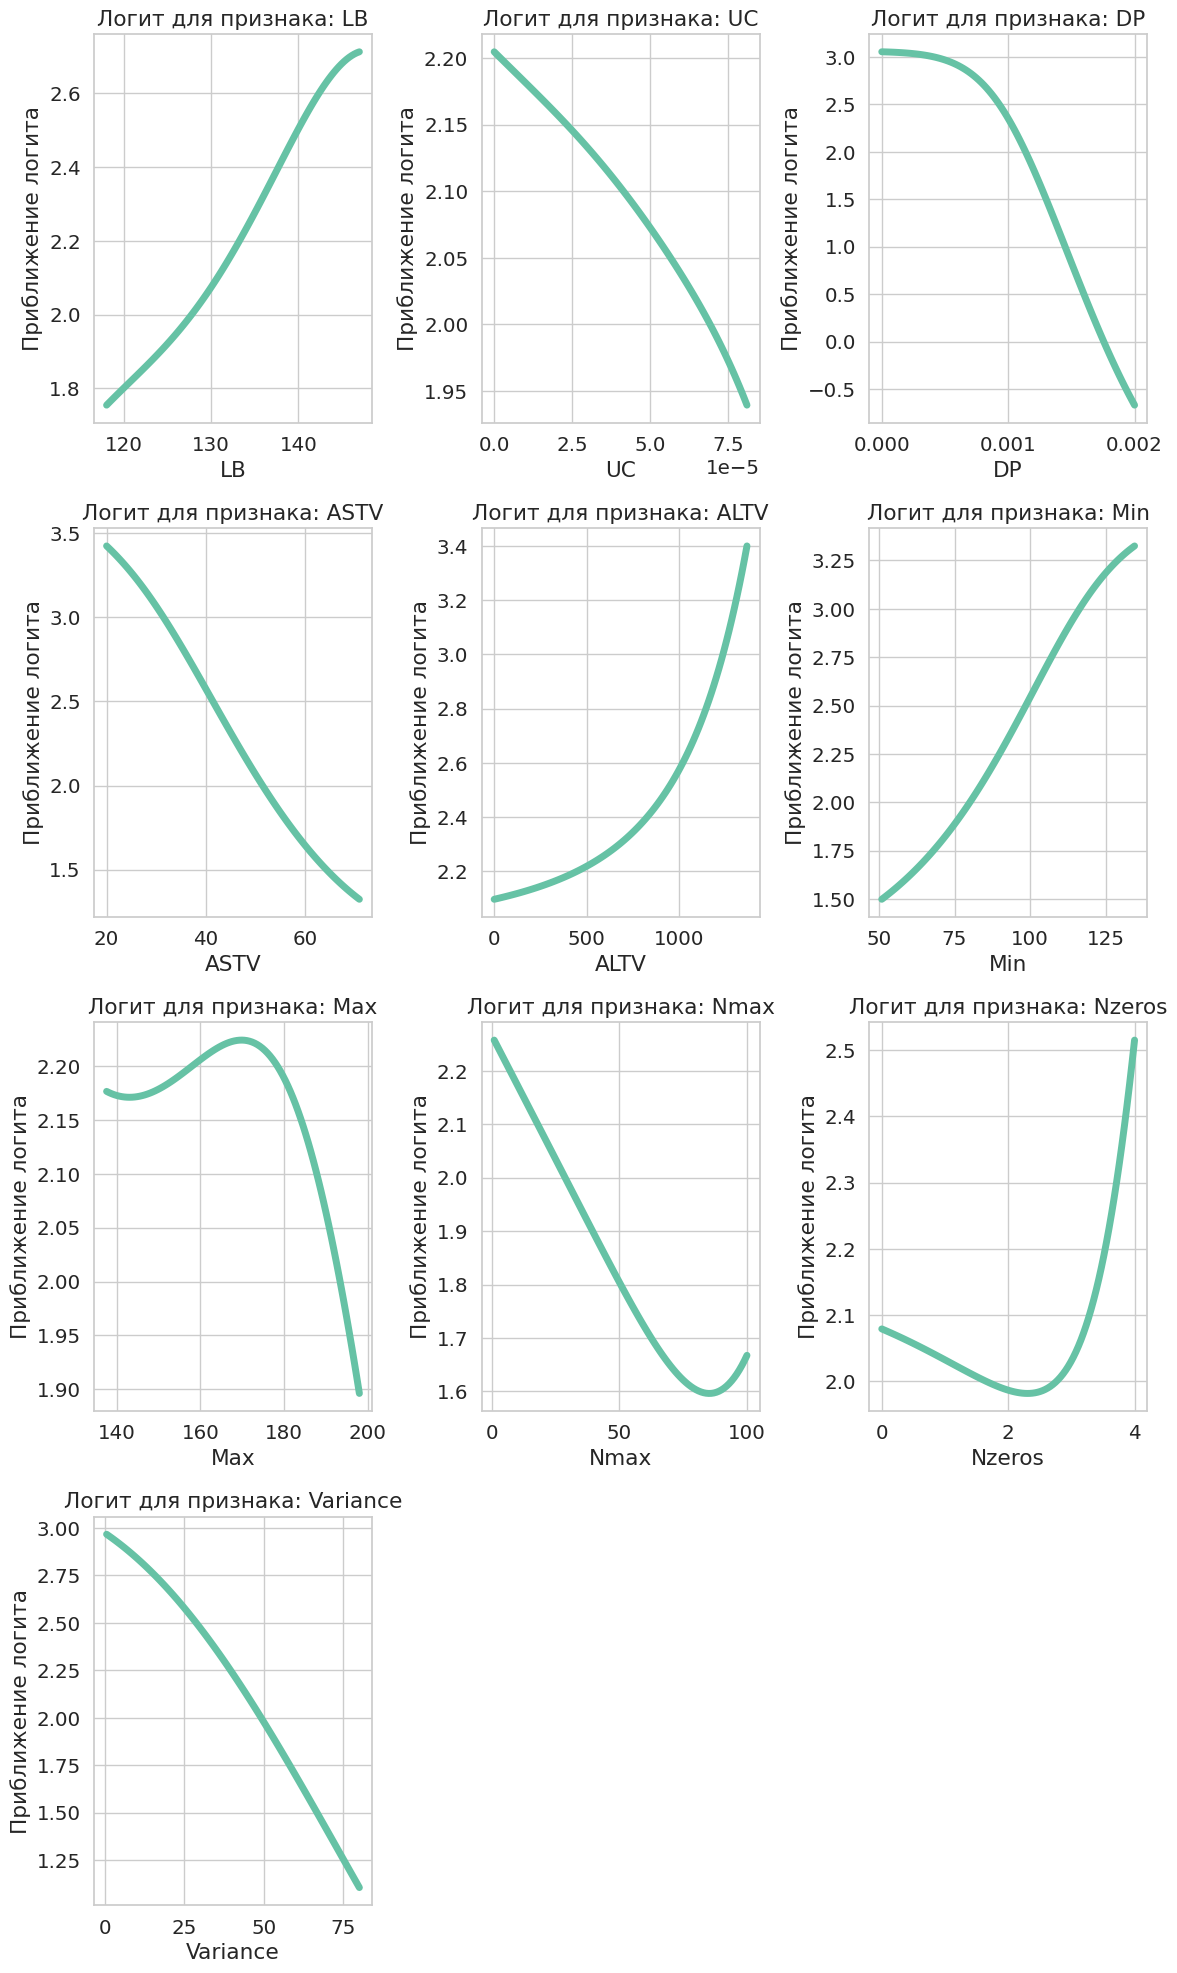

In [568]:
X_fixed = X_not_corr.copy()

linear_cols = ["LB", 'ASTV', 'Min', 'Variance']
cols_to_sqrt = ["UC", "ALTV", "Nmax", "Nzeros"]


for col in cols_to_sqrt:
    X_fixed[col] = (X_fixed[col] + 1e-15) ** 2

y = train["NSP"]
log_reg_not_corr_fixed = sm.GLM(y, X_fixed, family=sm.families.Binomial())
results_log_reg_not_corr_fixed = log_reg_not_corr_fixed.fit()


plot_logit_approximation(results_log_reg_not_corr_fixed, X_fixed, y)

**7.** Оставьте только значимые и преобразованные признаки, обучите модель еще раз и проинтерпретируйте полученные результаты. Какой смысл имеют коэффициенты модели?

In [569]:
X_final = X_not_corr[linear_cols + cols_to_sqrt]
X_test = tmp_test[linear_cols + cols_to_sqrt]

for col in cols_to_sqrt:
    X_final[col] = X_final[col] ** 2
    X_test[col] = X_test[col] ** 2
    
X_final = sm.add_constant(X_final)

log_reg_final = sm.GLM(y, X_final, family=sm.families.Binomial())
results_log_final = log_reg_final.fit()

print(results_log_final.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    NSP   No. Observations:                 1373
Model:                            GLM   Df Residuals:                     1364
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -179.98
Date:                Tue, 03 Dec 2024   Deviance:                       359.97
Time:                        00:40:34   Pearson chi2:                 5.49e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3209
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5902      2.387      4.018      0.0

Коэффициенты модели -- то на что домнажается X в сигмоиде. Наши действия не привели в сущности к каким либо изменениям. Модель все также имеет огромные коэффициенты, а функция правдоподобия равна бесконечности.

In [570]:
calculate_f1_score(X_final, y, X_test, test["NSP"], add_const=True);

F1-score=0.98


**8.** Для некоторых объектов из тестовой выборки оцените вероятность наличия патологии. Постройте также доверительный интервал уровня доверия 0.95 для этой вероятности.

*Указание.* Воспользуйтесь функцией <a href="https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLMResults.get_prediction.html">get_prediction</a> от `GLMResults`. Данная функция возвращает объект <a href="https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.PredictionResults.html">`PredictionResults`</a>, у которого можно вызвать метод `conf_int`.

Проинтерпретируйте границы полученных доверительных интервалов. Как их можно использовать в медицине?

In [571]:
NUM_OF_EXAMPLES = 10
rand_indices = np.random.permutation(len(test))[:NUM_OF_EXAMPLES]

X_test_with_const = sm.add_constant(X_test)
for i in rand_indices:
    prediction = results_log_final.get_prediction(X_test_with_const.iloc[i])
    conf_int = prediction.conf_int()
    print(f"Дов. интервал для значения {test["NSP"].iloc[i]}: [{conf_int[0][0]:.2f}, {conf_int[0][1]:.2f}]")

Дов. интервал для значения 1: [0.83, 0.92]
Дов. интервал для значения 1: [1.00, 1.00]
Дов. интервал для значения 0: [0.14, 0.45]
Дов. интервал для значения 1: [0.91, 0.96]
Дов. интервал для значения 1: [0.75, 0.90]
Дов. интервал для значения 1: [1.00, 1.00]
Дов. интервал для значения 1: [0.99, 1.00]
Дов. интервал для значения 1: [1.00, 1.00]
Дов. интервал для значения 1: [1.00, 1.00]
Дов. интервал для значения 1: [0.99, 1.00]


Как видим, модель почти всегда уверена в своих предсказаниях и потому, доверительные интервалы достаточно узкие. Таким образом если доверительный интервал близок к 0, то это можно трактовать как высокий шанс наличия паталогии

Почти все плоды не имеют паталогии, поэтому важно сравнить точность, с моделью, которая предсказывает всегда самый вероятный класс

In [572]:
X_final = X_not_corr[linear_cols + cols_to_sqrt]
X_test = tmp_test[linear_cols + cols_to_sqrt]

for col in cols_to_sqrt:
    X_final[col] = X_final[col] ** 2
    X_test[col] = X_test[col] ** 2
    
X_final = sm.add_constant(X_final)

calculate_f1_score(X_final, y, X_test, np.array([1] * len(X_test)), add_const=True);

F1-score=0.95


**Вывод:**

Нам удалось построить линейную модель, которая имеет тот же f1-score, но при этом зависит от меньшего числа параметров. Тем не менее мы все же потеряли как в функции правдоподобия, так и в f1-score, но кажется, что эту потерю можно назвать незначительной.

Тем не мнее, модель предсказывающая всегда один и тот же класс дает f1-score не намного ниже нашей.

---
### Задача P3.

Вам выдается сводная статистика о посетителях сайта miptstats.github.io за период с февраля по май этого года. В каждой ячейке таблицы записано количество посетителей определенного условия, которые хотя бы раз посетили сайт. Пол посетителя определяется технологией Яндекс.Метрики.

In [573]:
data = pd.DataFrame(
    {
        "Мужской": [3422, 1299, 367, 363, 61, 30],
        "Женский": [1303, 510, 189, 122, 28, 5],
    },
    index=["Chrome", "Яндекс Браузер", "Edge", "Opera", "Safari", "Firefox"],
)
data

,Мужской,Женский
Chrome,3422,1303
Яндекс Браузер,1299,510
Edge,367,189
Opera,363,122
Safari,61,28
Firefox,30,5


Проверьте гипотезу о том, что тип используемого браузера не зависит от пола посетителя. Сделайте вывод.

Воспользуемся критерием хи-квадрат.

In [574]:
chi2, p, dof, expected = sps.chi2_contingency(data)

In [575]:
def cramer(chi2, n, k1, k2):
    """
    Коэффициент Крамера, считающийся по статистике критерия хи-квадрат
    
    :param chi2: Статистика критерия хи-квадрат
    :param n: Размер выборки
    :param k1: Количество различных значений первой выборки
    :param k2: Количество различных значений второй выборки
    
    :returns: Коэффициент корреляции Крамера
    """
    
    return np.sqrt(chi2 / (n * min(k1, k2) - 1))

Посмотрим не применимость критерия

In [576]:
(expected < 5).mean()

0.0

Получилось значение меньше 0.2, значит критерий применим.

In [577]:
print(f"Значение статистики хи-квадрат: {chi2:.2f}, p-value = {p:.3f}")

Значение статистики хи-квадрат: 16.09, p-value = 0.007


Подсчитаем также коэффициент Крамера.

In [578]:
n = np.sum(data.values)

cramer_coef = cramer(chi2, n, 6, 6)
print(f"Коэффициента Крамера = {cramer_coef:.3f}")

Коэффициента Крамера = 0.019


Так как p-value < 0.05 и коэффициент Крамера мал, то можно сделать вывод, что выборк браузера не зависит от пола.

---
### Задача P4.

Скачайте <a href="http://archive.ics.uci.edu/ml/datasets/Bank+Marketing">данные</a> маркетинговых кампаний португальского банковского учреждения. Цель задачи &mdash; с целью дальнейшего исследования понять, какие условия (среди 20 признаков) влияют на подписание клиентом срочного депозита (величина $y$). Выполните задачу двумя способами:

* методами анализа зависимостей, выяснив, какие характеристики клиента оказывают влияние на целевую переменную, и указав степень влияния;

* вычислив важность признаков, полученной с помощью Random Forest, разбив предварительно данные на обучающую и тестовую части.

Проинтерпретируйте полученные результаты.

*Напоминание*: в случае отбора признаков с целью дальнейшего исследования можно применять методы, контролирующие FDR на уровне не более 0.1.

In [579]:
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  

In [580]:
# y[y["y"] == 'no'] = 0
# y[y["y"] == 'yes'] = 1

In [581]:
data = pd.concat([X, y], axis=1)

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [582]:
string_cols = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "poutcome",
    'y'
]
real_cols = [
    "age",
    "balance",
    "day_of_week",
    "duration",
    "campaign",
    "pdays",
    "previous",
]

1.

Вычислим корреляции Спирмена.

In [583]:
data_encoded = data.copy()

label_encoders = {} 
for col in string_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le  

data_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [584]:
correlations = data_encoded.corr(method='spearman')['y'].iloc[:-1].sort_values()
correlations

contact       -0.145088
poutcome      -0.144374
housing       -0.139173
campaign      -0.084054
loan          -0.068185
day_of_week   -0.029548
default       -0.022419
month         -0.019708
age           -0.008750
job            0.042281
marital        0.049112
education      0.069735
balance        0.100295
pdays          0.154055
previous       0.169124
duration       0.342469
Name: y, dtype: float64

Визуализируем полученные корреляции.

In [585]:
sns.set(font_scale=1.3, style='white', palette='Set2')

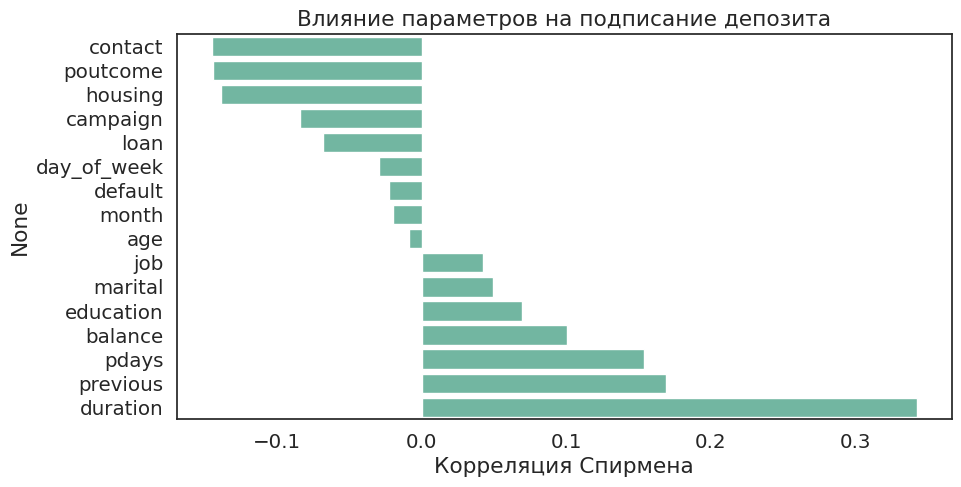

In [586]:
plt.figure(figsize=(10, 5))
sns.barplot(y=correlations.index, x=correlations)
plt.title('Влияние параметров на подписание депозита')
plt.xlabel('Корреляция Спирмена');

Отсюда видим, что самую большую роль в скором подписании играют параметр duration, примерно одинаковое влияние имеют параметры previous, pdays. Также можно отметить balance и education.

Отрицательную роль играют признаки contact, poutcome, housing, campaign и loan

Влияние остальных признаков можно считать слишком малым.

Применим также критерий хи-квадрат.

In [587]:
# import pandas as pd
# import numpy as np
# import scipy.stats as sps

# results_list = []

# for col in data_encoded.columns:
#     # data_encoded[col] = pd.to_numeric(data_encoded[col], errors='coerce')

#     contingency_table = pd.crosstab(data_encoded[col], data_encoded['y'])
#     chi2, p, dof, expected = sps.chi2_contingency(contingency_table)

#     applicability = (expected < 5).mean()
#     cramer_coef = cramer(chi2, data.shape[0], )
    
#     results_list.append({
#         'Column': col,
#         'Chi2': chi2.round(1),
#         'P-value': p,
#         'Применимость': applicability < 0.2,
#         'reject' : p < 0.05,
#     })

# results = pd.DataFrame(results_list)

# results

Как видим, критерий хи-квадрат вообще говорит об отсутствии значимых признаков.

2.

In [588]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

label_encoders = {}

for col in string_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

In [589]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
41626,52,0,1,1,0,118,0,0,0,25,11,105,1,-1,0,3,0
31347,28,8,2,1,0,459,0,0,0,16,7,83,13,-1,0,3,0
22563,36,4,2,2,0,156,0,0,0,22,1,122,1,-1,0,3,0
37243,55,2,1,2,0,323,1,1,0,13,8,200,1,-1,0,3,0
32259,38,7,0,1,0,904,1,0,0,16,0,361,1,339,1,0,0


In [590]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(train.drop(columns=["y"]), train["y"]);

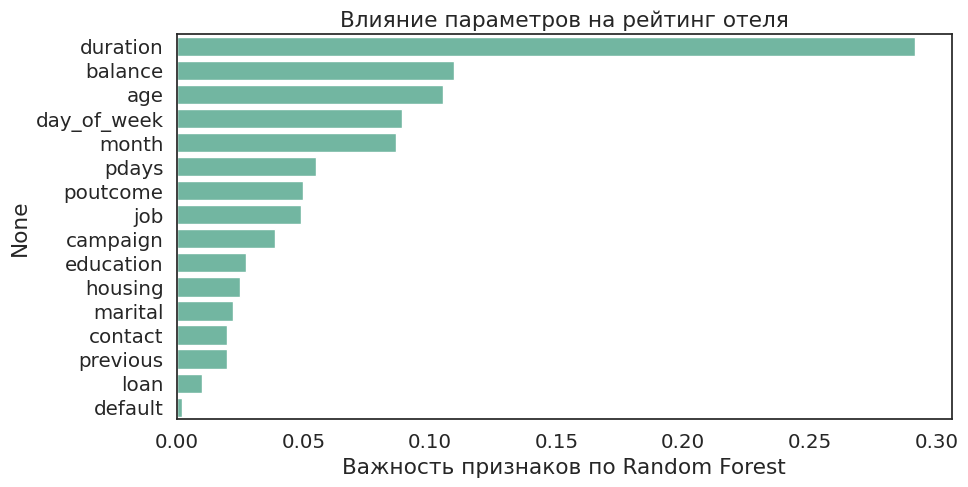

In [591]:
fi = pd.Series(
    rf.feature_importances_,
    index=train.drop(columns=["y"]).columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y=fi.index, x=fi)
plt.title('Влияние параметров на рейтинг отеля')
plt.xlabel('Важность признаков по Random Forest');

В этом случае самымы важными оказались duration, balance, age. 

Cамыми не важными не являются default, loan и contact.

**Вывод:** Была проделана работа по выявлению самых важных признаков при подписании депозита. Используя корреляцию Спирмена, мы выясняли, что положительную корреляцию имеютЖ duration, previous и pdays. Отрицательную: contact, poutcome, housing

Используя случайный лес, выяснили, что самыми важными признаками являются duration, balance и age